In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
import pandas as pd

df = pd.read_csv(r"D:\munich.csv",
                 sep=";",           # <— en kritik kısım
                 parse_dates=["time"],
                 dayfirst=True,      # 01.03.2024 gibi tarihleri doğru anlasın diye
                 encoding="utf-8",   # sorun olursa "latin-1" deneyebilirsin
                 na_values=["", "NaN", "nan", None])

num_cols = ["precipitation_sum (mm)", "snowfall_sum (cm)"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df.head()


,time,precipitation_sum (mm),snowfall_sum (cm)
0,2024-03-01,NaN,NaN
1,2024-03-02,NaN,NaN
2,2024-03-03,NaN,NaN
3,2024-03-04,NaN,NaN
4,2024-03-05,NaN,NaN


In [48]:
df.isnull().sum()

time                       0
precipitation_sum (mm)    19
snowfall_sum (cm)         19
dtype: int64

In [49]:
df["precipitation_sum (mm)"].fillna("0", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28052\1763129680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["precipitation_sum (mm)"].fillna("0", inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_28052\1763129680.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["precipitation_sum (mm)"].fillna("0", inplace=True)


In [50]:
df["snowfall_sum (cm)"].fillna("0", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28052\2105273793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["snowfall_sum (cm)"].fillna("0", inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_28052\2105273793.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["snowfall_sum (cm)"].fillna("0", inplace=True)


In [51]:
df

,time,precipitation_sum (mm),snowfall_sum (cm)
0,2024-03-01,0,0
1,2024-03-02,0,0
2,2024-03-03,0,0
3,2024-03-04,0,0
4,2024-03-05,0,0
...,...,...,...
148,2024-07-27,0.3,0.0
149,2024-07-28,1.6,0.0
150,2024-07-29,0.0,0.0
151,2024-07-30,0.0,0.0


In [56]:
df["time"] = pd.to_datetime(df["time"])

In [57]:
df

,time,precipitation_sum (mm),snowfall_sum (cm)
0,2024-03-01,0,0
1,2024-03-02,0,0
2,2024-03-03,0,0
3,2024-03-04,0,0
4,2024-03-05,0,0
...,...,...,...
148,2024-07-27,0.3,0.0
149,2024-07-28,1.6,0.0
150,2024-07-29,0.0,0.0
151,2024-07-30,0.0,0.0


In [65]:
df["mounth"] = pd.to_datetime(df["time"]).dt.month  

def mevsim(mounth):
    if mounth in [1,2,12]:
        return "Kiş"
    elif mounth in [3,4,5]:
        return "İlkbahar"
    elif mounth in [6,7,8]:
        return "Yaz"
    else:
        return "Sonbahar"
        
df["mevsim"] = df["mounth"].apply(mevsim)

df.head()

,time,precipitation_sum (mm),snowfall_sum (cm),mounth,mevsim
0,2024-03-01,0,0,3,İlkbahar
1,2024-03-02,0,0,3,İlkbahar
2,2024-03-03,0,0,3,İlkbahar
3,2024-03-04,0,0,3,İlkbahar
4,2024-03-05,0,0,3,İlkbahar


In [66]:
df.groupby("mevsim")["precipitation_sum (mm)"].count()

mevsim
Yaz         61
İlkbahar    92
Name: precipitation_sum (mm), dtype: int64

In [70]:
df.groupby("mevsim")["snowfall_sum (cm)"].count()

mevsim
Yaz         61
İlkbahar    92
Name: snowfall_sum (cm), dtype: int64

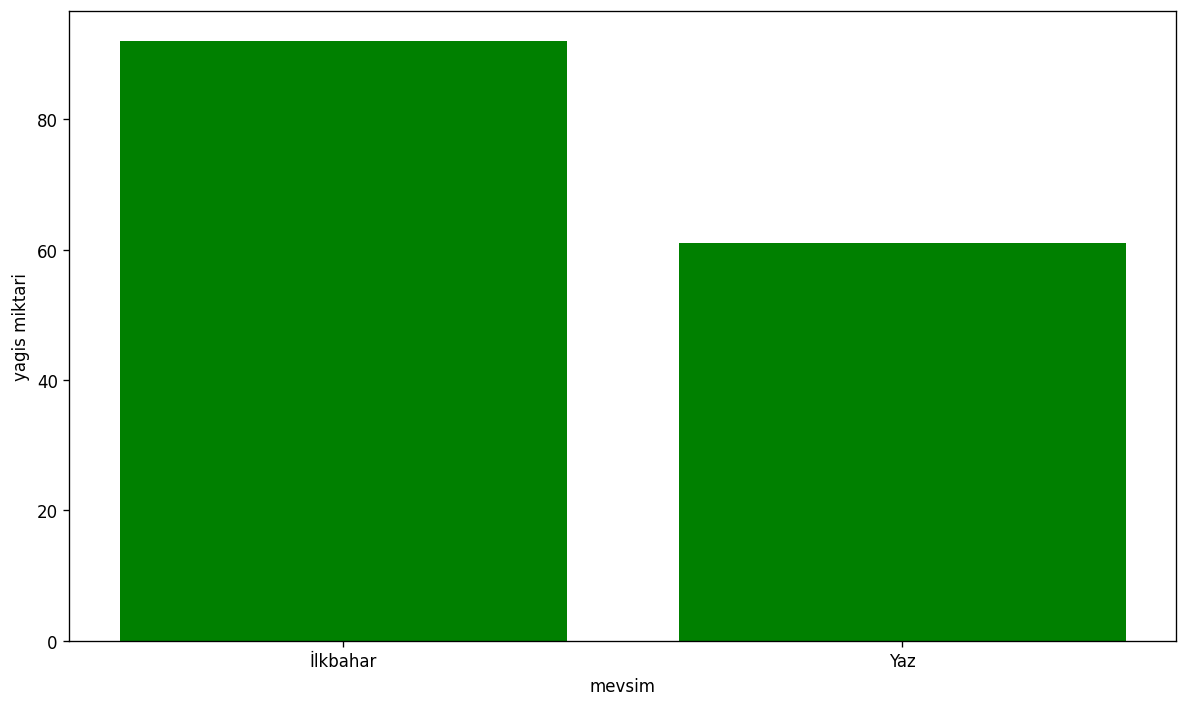

In [75]:
mevsim = df["mevsim"].value_counts().head(10)
plt.figure(figsize=(10,6), dpi=120)
plt.bar(mevsim.index, mevsim.values, color = "green")
plt.xlabel("mevsim")
plt.ylabel("yagis miktari")
plt.tight_layout()
plt.show()

In [82]:
df["snowfall_sum (cm)"] = pd.to_numeric(df["snowfall_sum (cm)"], errors="coerce").fillna(0)


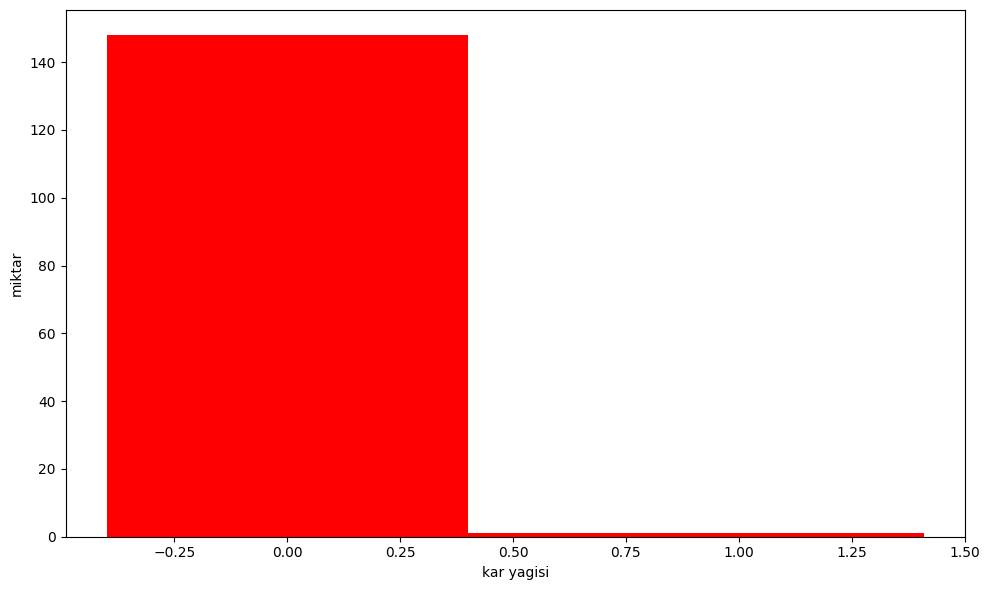

In [83]:
kar = df["snowfall_sum (cm)"].value_counts().head(6)
plt.figure(figsize=(10,6), dpi= 100)
plt.bar(kar.index , kar.values, color= "red")
plt.xlabel("kar yagisi")
plt.ylabel("miktar")
plt.tight_layout()
plt.show()